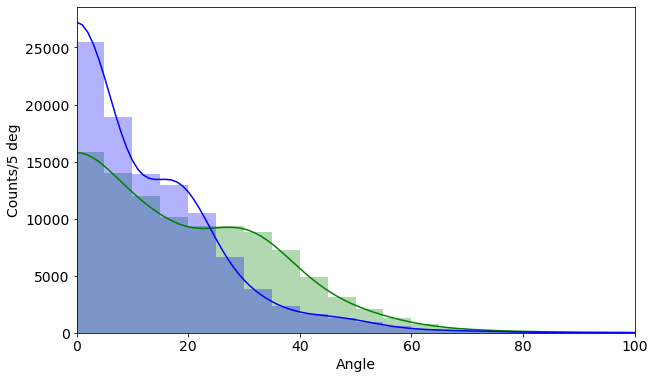

In [109]:
# Reads probability distribution from file and return a list of random numbers based on the distribution

import pandas as pd
import matplotlib.pyplot as plt
import random


def randomPDF(n = 1, fileName = "DataSets/2702_l3.csv"):      # returns random numbers list of length n  
                                                            # with pdf given in fileName
    dis = pd.read_csv(fileName, header = None)           # Reads probability distribution
    cdf = [sum(dis[1][:i]) for i in range(len(dis))]     # Obtainining CDF
    cdf = [num/cdf[-1] for num in cdf]                   # Normalizing CDF

    pdf = list()
    for i in range(n):
        rnd = random.random()
        i = 0
        while rnd > cdf[i]:
            i = i + 1
        f = (cdf[i]-rnd)/(cdf[i]-cdf[i-1])
        pdf.append( dis[0][i-1]+f )
    return (pdf)

plt.figure(figsize=(10,6))
plt.rc('font', size = 14) 

num = 100000

dis = pd.read_csv("DataSets/2702_l3.csv", header = None)           # Reads probability distribution
plt.plot(dis[0], num*47/200*dis[1], color='g')

dis = pd.read_csv("DataSets/2616_l1.csv", header = None)           # Reads probability distribution
plt.plot(dis[0], num*45/200*dis[1], color='b')

kwargs = dict(alpha = 0.3, bins = [5*i for i in range(36)])
plt.hist(randomPDF(num, "DataSets/2702_l3.csv"), **kwargs, color='g')
plt.hist(randomPDF(num, "DataSets/2616_l1.csv"), **kwargs, color='b')
plt.xlabel('Angle')
plt.ylabel('Counts/5 deg')
plt.xlim([0,100])
plt.show()

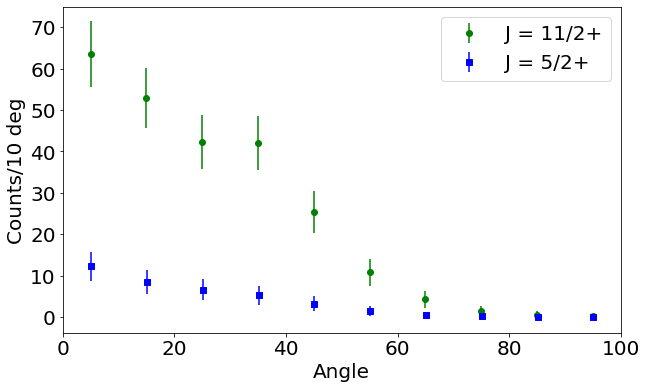

In [194]:
import numpy as np


dis_2702_l1 = pd.read_csv("DataSets/2702_l1.csv", header = None)           # Reads probability distribution
dis_2702_l3 = pd.read_csv("DataSets/2702_l3.csv", header = None)           # Reads probability distribution
dis_2767_l3 = pd.read_csv("DataSets/2767_l3.csv", header = None)           # Reads probability distribution

num = 455
data_2767_l3       =  [num*8.1909/70*dis_2767_l3[1][10*i] for i in range(18)]
data_2767_l3_error =  [np.sqrt(num) for num in data_2767_l3]

num = 70
data_2702_l1l3       =  [num*19.627/70*(0.14/0.4*dis_2702_l1[1][10*i] + 0.26/0.4*dis_2702_l3[1][10*i]) for i in range(18)]
data_2702_l1l3_error =  [np.sqrt(num) for num in data_2702_l1l3]

angle1 = [5 + 10*i for i in range(18)]
angle2 = [5.1 + 10*i for i in range(18)]

plt.figure(figsize=(10,6))
plt.rc('font', size = 20) 

plt.errorbar(angle1, data_2767_l3,   yerr = data_2767_l3_error,   color='g', fmt = 'o', label='J = 11/2+')
plt.errorbar(angle2, data_2702_l1l3, yerr = data_2702_l1l3_error, color='b', fmt = 's', label='J = 5/2+')
plt.xlabel('Angle')
plt.ylabel('Counts/10 deg')
plt.xlim([0,100])
plt.legend()
plt.savefig("DataSets/angularDist.pdf")
plt.show()
